In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('player_stats_w_pos.csv', header=0, index_col=0)
df.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,team_id,team_name,name,element_type_x,position_name_x,element_type_y,position_name_y,gameweek,element_type,position_name
0,1,2,8,0,False,2020-09-12T11:30:00Z,0.0,3.0,1,0,...,1,Arsenal,Mesut Özil,3,Midfielder,3,Midfielder,2020-09-12,3,Midfielder
1,1,9,19,0,True,2020-09-19T19:00:00Z,2.0,1.0,2,0,...,1,Arsenal,Mesut Özil,3,Midfielder,3,Midfielder,2020-09-19,3,Midfielder
2,1,23,11,0,False,2020-09-28T19:00:00Z,3.0,1.0,3,0,...,1,Arsenal,Mesut Özil,3,Midfielder,3,Midfielder,2020-09-28,3,Midfielder
3,1,29,15,0,True,2020-10-04T13:00:00Z,2.0,1.0,4,0,...,1,Arsenal,Mesut Özil,3,Midfielder,3,Midfielder,2020-10-04,3,Midfielder
4,1,44,12,0,False,2020-10-17T16:30:00Z,1.0,0.0,5,0,...,1,Arsenal,Mesut Özil,3,Midfielder,3,Midfielder,2020-10-17,3,Midfielder


## Visualize player stats

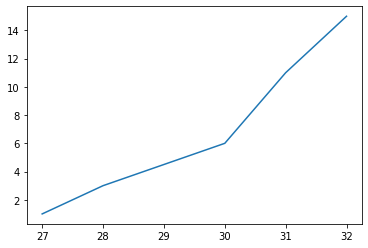

In [3]:

player = 'Mason Greenwood'
weeks = 6

gameweeks_x = df['gameweek'].unique()

gameweeks_x = sorted(gameweeks_x.tolist(), reverse=True)
latest_round = df['round'].max()

def filter_by_weeks(weeks):
    round_list = []
    latest_round = df['round'].max()
    round_list.append(latest_round)
    for i in range(weeks-1):
        latest_round -=1
        round_list.append(latest_round)
    return round_list


filtered_df = df[df['round'].astype('int64').isin(filter_by_weeks(weeks))]

results = filtered_df[filtered_df['name'] == player]


plt.plot(results['round'], results['total_points'])

## How is my goalkeeper doing?



## Moving average of total_points

### SO WHO IS DOING WELL???? 
#### best performers by position

In [34]:
weeks = 3 #int(input('How many weeks back?: '))
position = 'Defender'
sm_df = df[['element', 'name', 'team_name', 'position_name','round', 'total_points']]
display(sm_df.head())
sm_df.to_csv('player_stats_sm.csv', index=True)
filtered_df = df[(df['round'].astype('int64').isin(filter_by_weeks(weeks)))]
filtered_df = filtered_df[filtered_df['position_name'] == position]
#which goalie has hightest total poiints
total_points_by_pos = filtered_df.groupby(['element', 'name', 'team_name'])['total_points'].sum()
tp_by_points = total_points_by_pos[total_points_by_pos > 10]
tp_by_points = tp_by_points.sort_values(ascending=False)
tp_by_points
#['Midfielder' 'Defender' 'Forward' 'Goalkeeper']


,element,name,team_name,position_name,round,total_points
0,1,Mesut Özil,Arsenal,Midfielder,1,0
1,1,Mesut Özil,Arsenal,Midfielder,2,0
2,1,Mesut Özil,Arsenal,Midfielder,3,0
3,1,Mesut Özil,Arsenal,Midfielder,4,0
4,1,Mesut Özil,Arsenal,Midfielder,5,0


element  name                    team_name
259      Trent Alexander-Arnold  Liverpool    23
152      Seamus Coleman          Everton      21
200      Stuart Dallas           Leeds        19
274      Benjamin Mendy          Man City     17
546      Nélson Cabral Semedo    Wolves       16
461      Romain Saïss            Wolves       15
459      Conor Coady             Wolves       14
563      Rayan Ait Nouri         Wolves       14
558      Vladimir Coufal         West Ham     12
16       Rob Holding             Arsenal      11
255      Andrew Robertson        Liverpool    11
Name: total_points, dtype: int64

In [91]:
def filter_by_weeks(weeks):
    round_list = []
    latest_round = df['round'].max()
    round_list.append(latest_round)
    for i in range(weeks-1):
        latest_round -=1
        round_list.append(latest_round)
    return round_list


df_sm = pd.read_csv('player_stats_sm.csv', index_col=0)
df_sm.head()

weeks = 3 #int(input('How many weeks back?: '))
position = 'Defender'


filtered_df = df_sm[(df_sm['round'].astype('int64').isin(filter_by_weeks(weeks)))]

filtered_df = filtered_df[filtered_df['position_name'] == position]
filtered_df.info()
# which goalie has hightest total poiints
total_points_by_pos = filtered_df.groupby(['name', 'team_name'])['total_points'].sum()
total_points_by_pos.info()
#total_points_by_pos = filtered_df.groupby(['name']).agg({'total_points', 'sum'})
#tp_by_points = total_points_by_pos[total_points_by_pos > 10]
#tp_by_points = tp_by_points.sort_values(ascending=False)
#tp_by_points.head() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 61 to 20144
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   element        719 non-null    int64 
 1   name           719 non-null    object
 2   team_name      719 non-null    object
 3   position_name  719 non-null    object
 4   round          719 non-null    int64 
 5   total_points   719 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 39.3+ KB


AttributeError: 'Series' object has no attribute 'info'

In [74]:
to_chart = tp_by_points[0:7]

#sns.lineplot(x='round', y ='total_points', data=to_chart)
plt.show()

## Team stats

In [5]:
weeks = 4
filtered_df = df[df['round'].astype('int64').isin(filter_by_weeks(weeks))]

goals_conceded = filtered_df.groupby('team_name', as_index=False)['goals_conceded'].sum().sort_values(['goals_conceded'])
print(goals_conceded)

         team_name  goals_conceded
10       Liverpool              11
17       West Brom              22
2         Brighton              22
11        Man City              22
19          Wolves              33
12         Man Utd              33
6          Everton              33
8            Leeds              33
15     Southampton              55
9        Leicester              55
5   Crystal Palace              55
1      Aston Villa              55
4          Chelsea              66
14   Sheffield Utd              66
7           Fulham              77
16           Spurs              77
0          Arsenal              77
13       Newcastle              88
3          Burnley              88
18        West Ham             110


In [6]:
goals_scored = filtered_df.groupby('team_name', as_index=False)['goals_scored'].sum().sort_values(['goals_scored'])
print(goals_scored)

         team_name  goals_scored
14   Sheffield Utd             1
9        Leicester             2
5   Crystal Palace             2
15     Southampton             3
11        Man City             3
7           Fulham             3
6          Everton             3
19          Wolves             4
3          Burnley             4
2         Brighton             4
1      Aston Villa             4
8            Leeds             5
10       Liverpool             5
0          Arsenal             5
13       Newcastle             6
4          Chelsea             6
16           Spurs             7
12         Man Utd             8
17       West Brom             8
18        West Ham            11
